# Курсовая работа ТМО

# Задание
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

## 1. Поиск и выбор набора данных для построения моделей машинного обучения

В качестве набора данных мы будем использовать набор данных https://archive.ics.uci.edu/ml/datasets/Wine+Quality
Содержит оценки различных вин и данные о них с датчиков.

Датасет состоит из 1 файла:
- winequality-red.csv - данные о красном вине
- winequality-white.csv - данные о белом вине
- winequality.names - описание датасета

Файл содержит следующие колонки:
1. Фиксированная кислотность
2. Переменная кислотность (см https://en.wikipedia.org/wiki/Acids_in_wine)
3. Лимонная кислота
4. Остаточный сахар
5. Хлориды
6. Свободный диоксид серы
7. Всего диоксида серы
8. Плотность
9. pH
10. Сульфаты
11. Содержание алкоголя
12. Оценка вина (0 - 10)

В рассматриваемом примере будем решать задачу классификации:
- Для решения задачи в качестве целевого признака будем использовать новый признак **decent_wine**, который принимает значение 1 при оценке вина >= 6 и 0 в противном случае. Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Загрузка данных

Для удобства будем работать только с белым вином

In [0]:
data = pd.read_csv('data/winequality-white.csv', sep=";")

## 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных

In [4]:
# Первые 5 строк датасета
data.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [5]:
# Размер датасета
data.shape

(4898, 12)

In [6]:
# Список колонок
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Набор данных не содержит пропусков.

In [0]:
# добавим новый целевой признак

target = 'decent_wine'
data[target] = (data['quality'] >= 6).astype(int)

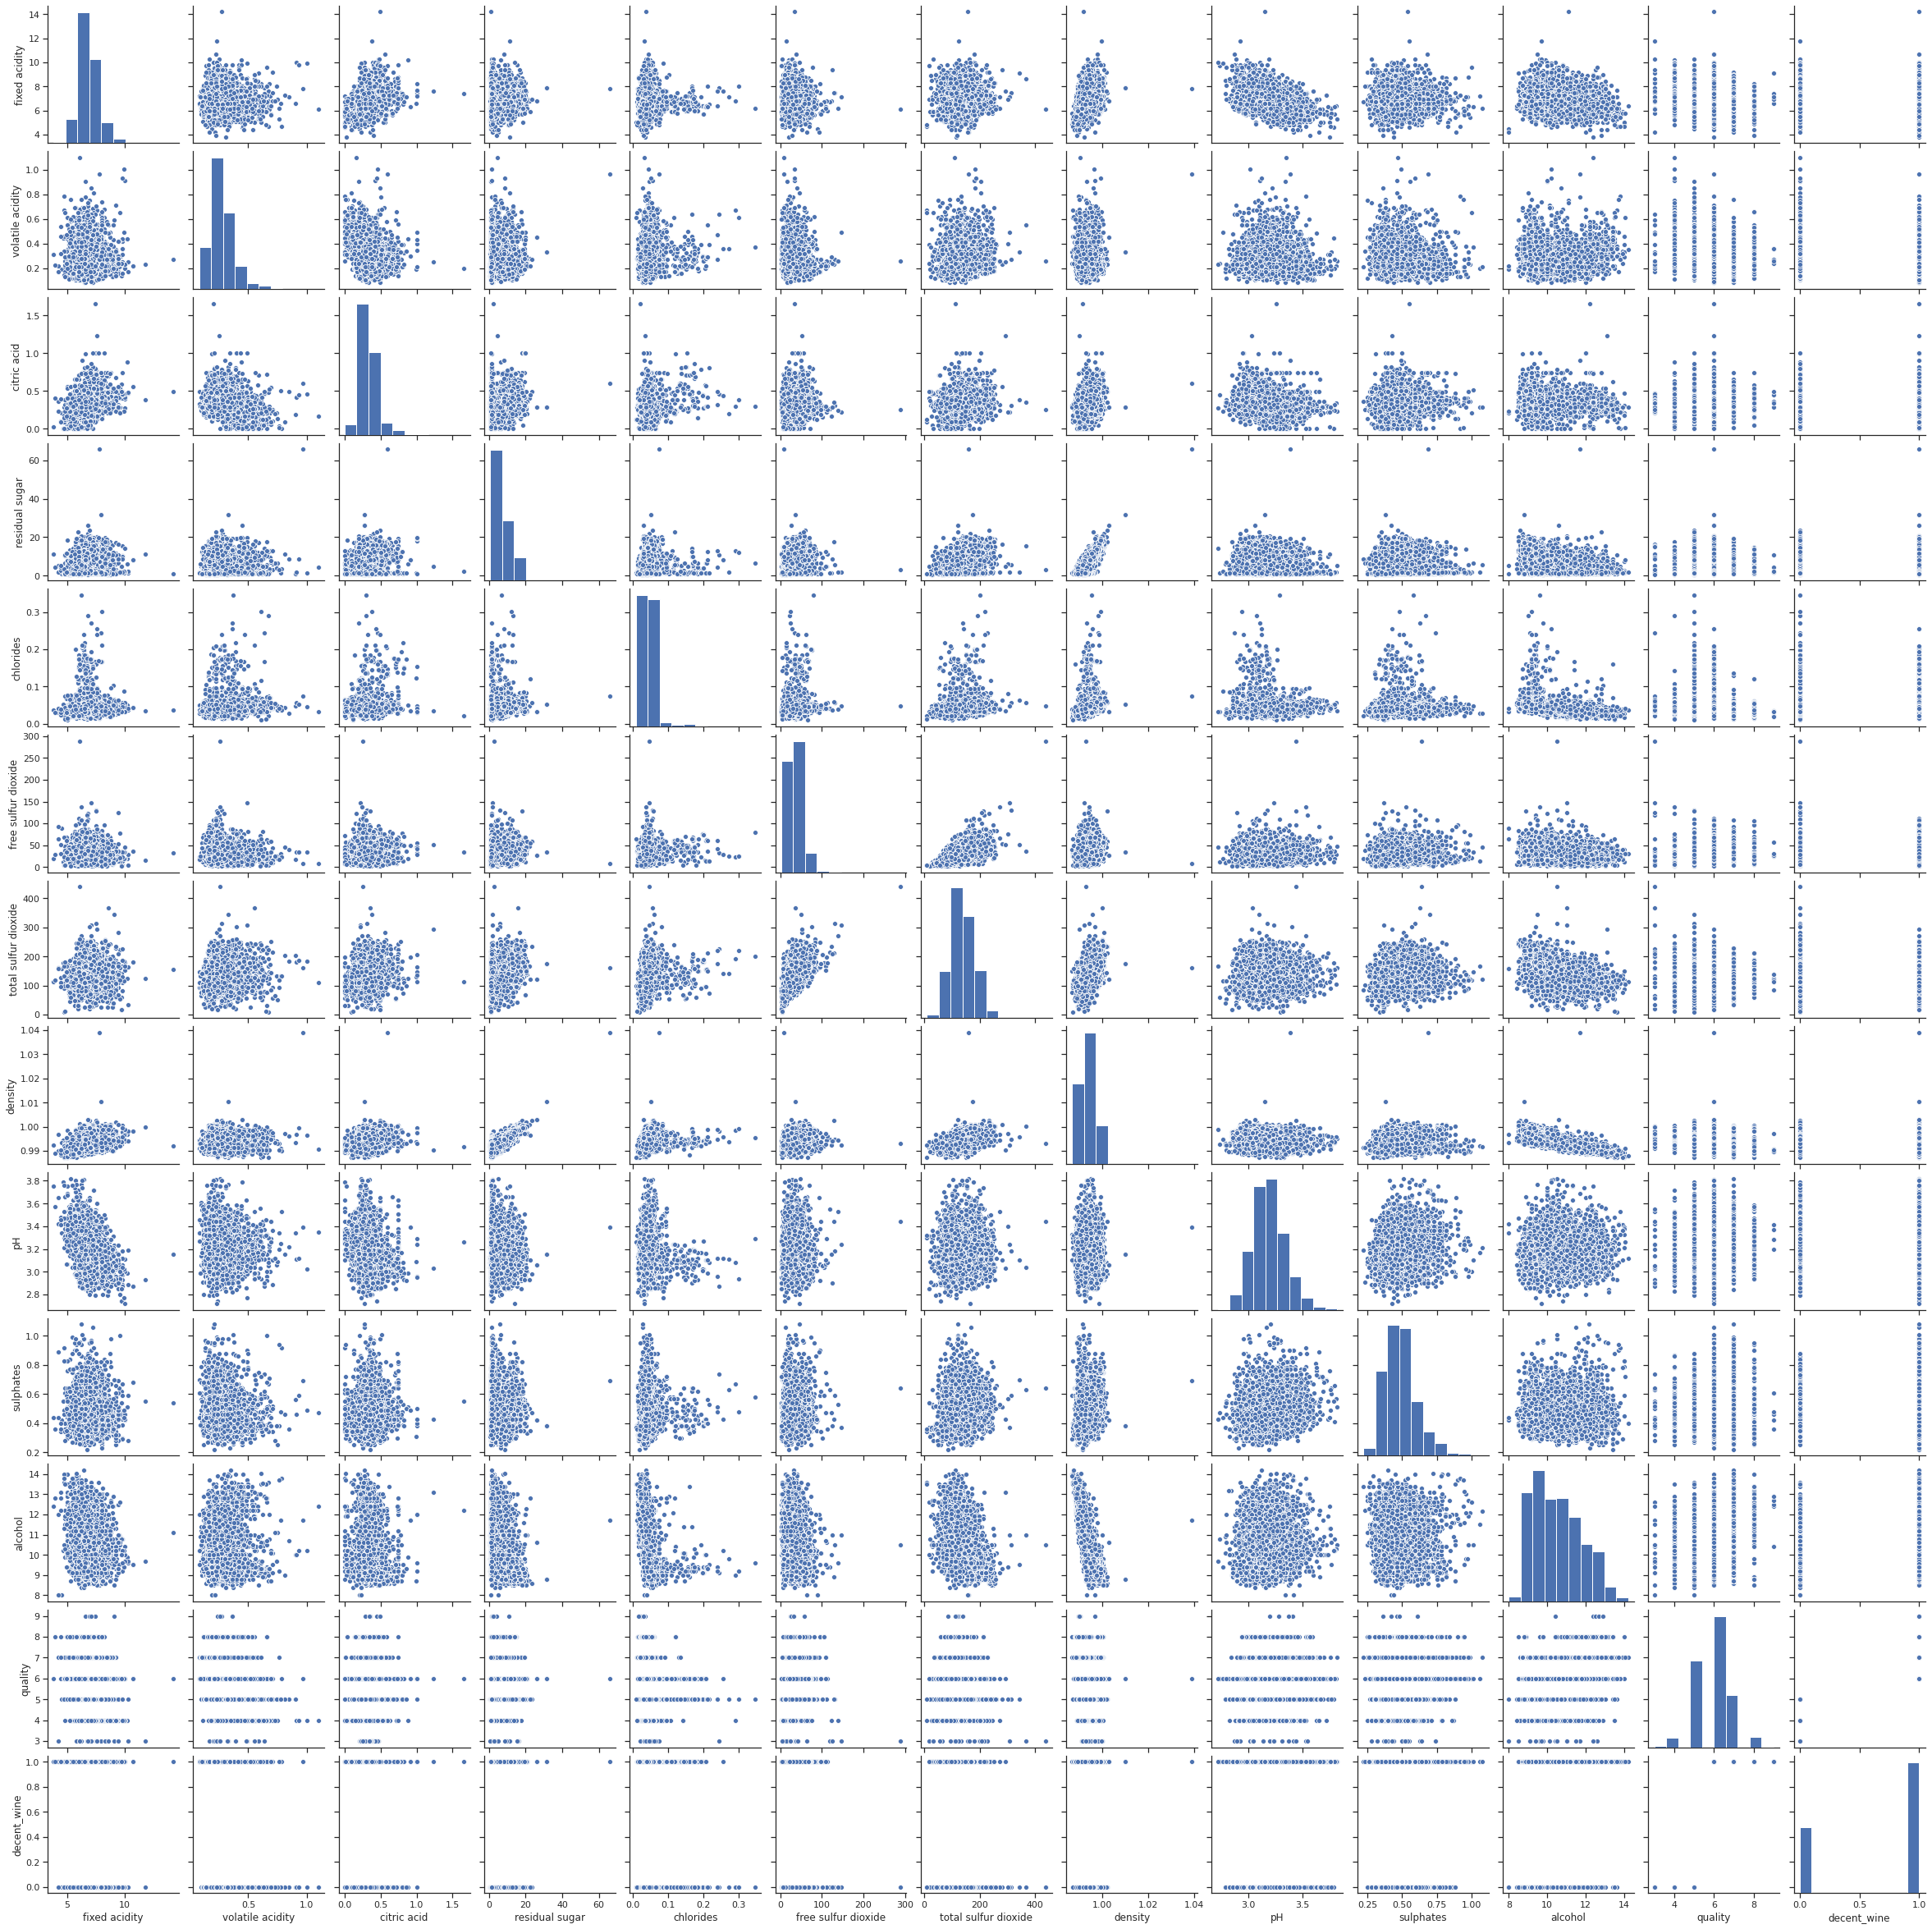

In [10]:
# Построим парные диаграммы для средних значений атрибутов
sns.pairplot(data)

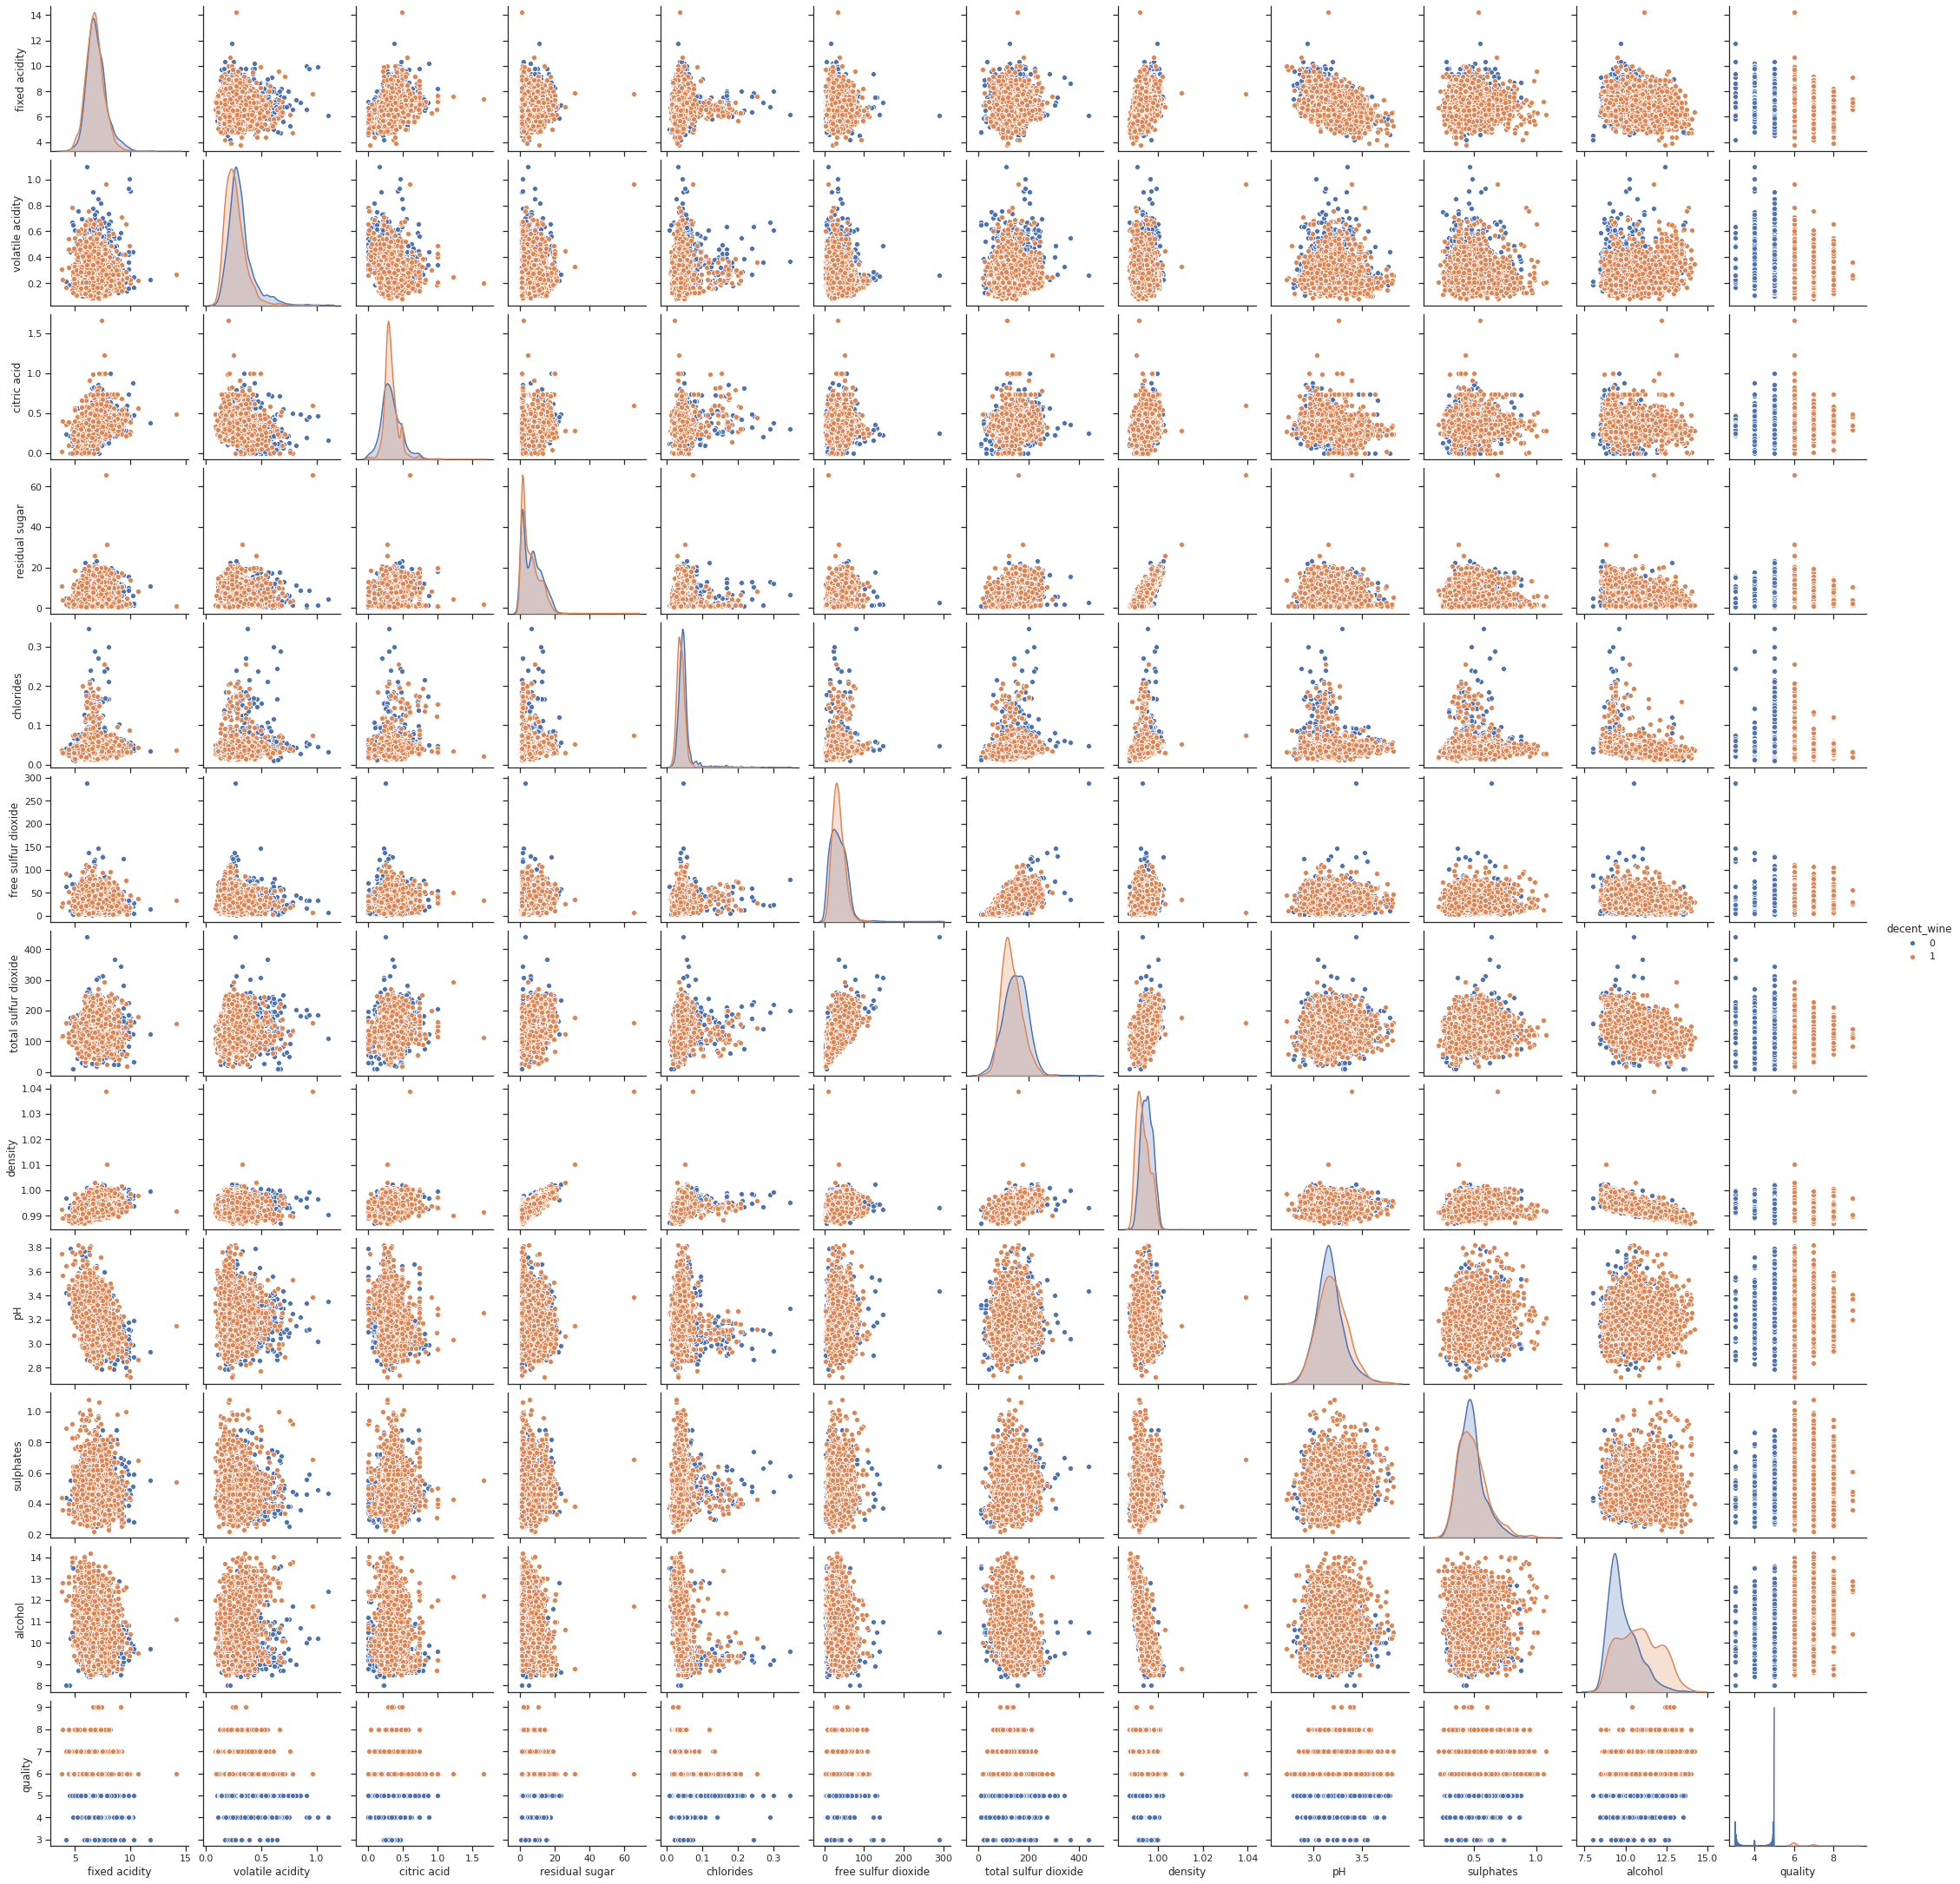

In [11]:
sns.pairplot(data, hue=target)

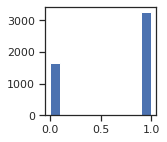

In [12]:
# Оценим дисбаланс классов для decent_wine
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data[target])
plt.show()

In [13]:
data[target].value_counts()

1    3258
0    1640
Name: decent_wine, dtype: int64

In [37]:
# Посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data[target].value_counts()
print('Класс 1 составляет {}%, а класс 0 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 1 составляет 66.52%, а класс 0 составляет 33.48%.


In [0]:
# Скрипичные диаграммы для числовых колонок
for col in data.columns:
    sns.violinplot(x=data[col])
    plt.show()

## 3. Проведение корреляционного анализа данных. Выбор признаков, подходящих для построения моделей

In [15]:
data.corr(method='pearson')

fixed acidity  volatile acidity  ...   quality  decent_wine
fixed acidity              1.000000         -0.022697  ... -0.113663    -0.089749
volatile acidity          -0.022697          1.000000  ... -0.194723    -0.225440
citric acid                0.289181         -0.149472  ... -0.009209    -0.000700
residual sugar             0.089021          0.064286  ... -0.097577    -0.092756
chlorides                  0.023086          0.070512  ... -0.209934    -0.183939
free sulfur dioxide       -0.049396         -0.097012  ...  0.008158    -0.001278
total sulfur dioxide       0.091070          0.089261  ... -0.174737    -0.170924
density                    0.265331          0.027114  ... -0.307123    -0.268696
pH                        -0.425858         -0.031915  ...  0.099427     0.083687
sulphates                 -0.017143         -0.035728  ...  0.053678     0.051858
alcohol                   -0.120881          0.067718  ...  0.435575     0.383280
quality                   -0.113663         -0.194723  ...  1.000000     0.802541
decent_wine               -0.089749         -0.225440  ...  0.802541     1.000000

[13 rows x 13 columns]

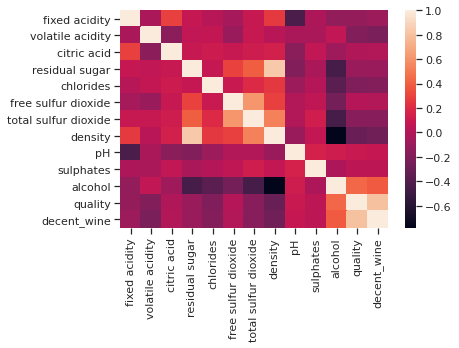

In [16]:
sns.heatmap(data.corr())

Из матрицы корреляции и тепловой карты можно увидеть, что сильнее всего с целевым признаком кореллируют
- alcohol (0.38)
- density (-0.26)
- volatile acidity (-0.22)
- clorides (-0.18)
- total sulfur dioxide (-0.17)

Уберем все остальные

In [38]:
essential_features = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'total sulfur dioxide']
data_stripped = data[essential_features + [target]]
data_stripped.head()

alcohol  density  ...  total sulfur dioxide  decent_wine
0      8.8   1.0010  ...                 170.0            1
1      9.5   0.9940  ...                 132.0            1
2     10.1   0.9951  ...                  97.0            1
3      9.9   0.9956  ...                 186.0            1
4      9.9   0.9956  ...                 186.0            1

[5 rows x 6 columns]

## 4. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей

In [21]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
decent_wine               int64
dtype: object

Категориальные признаки отсутствуют, их кодирование не требуется.

### Масштабирование данных

In [0]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_stripped[essential_features])

In [25]:
data_combined = data_stripped
for i in range(len(essential_features)):
    col = essential_features[i]
    new_col_name = col + '_scaled'
    data_combined[new_col_name] = data_scaled[:,i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
data_combined.head()

alcohol  density  ...  chlorides_scaled  total sulfur dioxide_scaled
0      8.8   1.0010  ...          0.106825                     0.373550
1      9.5   0.9940  ...          0.118694                     0.285383
2     10.1   0.9951  ...          0.121662                     0.204176
3      9.9   0.9956  ...          0.145401                     0.410673
4      9.9   0.9956  ...          0.145401                     0.410673

[5 rows x 11 columns]

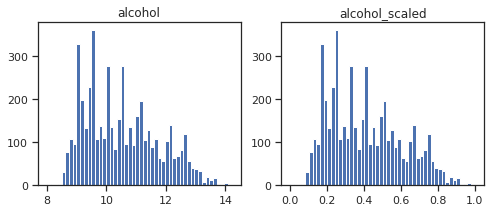

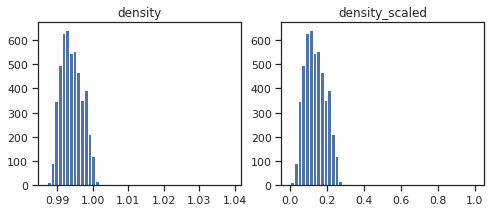

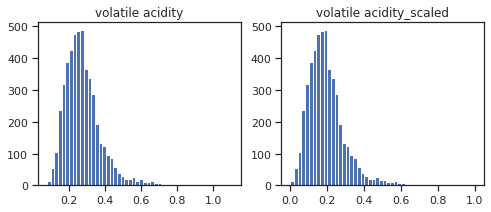

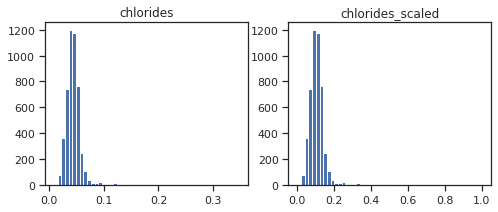

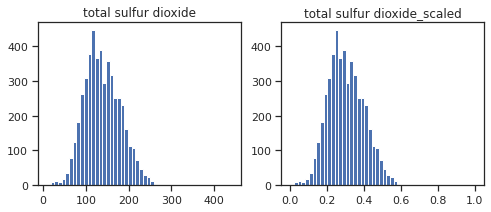

In [28]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in essential_features:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_combined[col], 50)
    ax[1].hist(data_combined[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [29]:
# Проверим, что масштабирование не повлияло на корреляционную матрицу.
all_features = essential_features + [target]
all_features

['alcohol',
 'density',
 'volatile acidity',
 'chlorides',
 'total sulfur dioxide',
 'decent_wine']

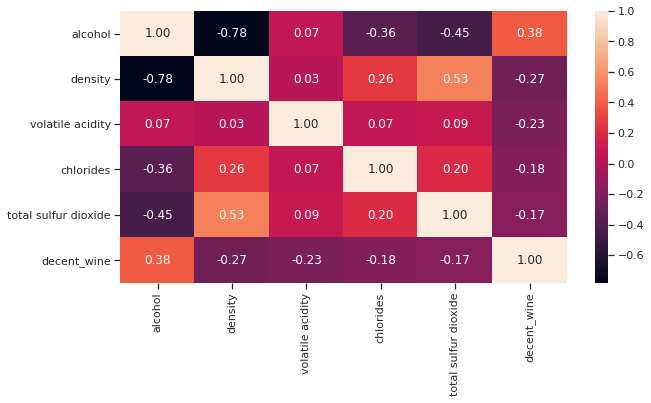

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_combined[all_features].corr(), annot=True, fmt='.2f')

In [35]:
essential_features_scaled = [f + '_scaled' for f in essential_features]
all_features_scaled = essential_features_scaled + [target]
all_features_scaled

['alcohol_scaled',
 'density_scaled',
 'volatile acidity_scaled',
 'chlorides_scaled',
 'total sulfur dioxide_scaled',
 'decent_wine']

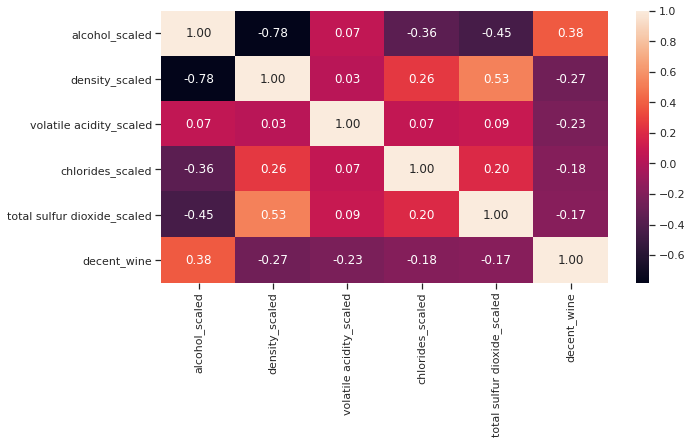

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_combined[all_features_scaled].corr(), annot=True, fmt='.2f')

## 5. Выбор метрик для последующей оценки качества моделей

В качестве метрик для решения задачи классификации будем использовать:
1. Метрика precision
2. Метрика recall (полнота)
3. Метрика F1-мера
4. Метрика ROC AUC

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

## 6. Выбор наиболее подходящих моделей для решения задачи

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7. Формирование обучающей и тестовой выборок на основе исходного набора данных

In [34]:
data_combined.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  decent_wine
0            7.0              0.27         0.36  ...      8.8        6            1
1            6.3              0.30         0.34  ...      9.5        6            1
2            8.1              0.28         0.40  ...     10.1        6            1
3            7.2              0.23         0.32  ...      9.9        6            1
4            7.2              0.23         0.32  ...      9.9        6            1

[5 rows x 13 columns]

In [0]:
x = data_combined[essential_features_scaled]
y = data_combined[target]

In [40]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (3673, 5)
x_test: (1225, 5)
y_train: (3673,)
y_test: (1225,)


## 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки

In [0]:
# Модели
class_models = {'LogR': LogisticRegression(), 
                'KNN_5': KNeighborsClassifier(n_neighbors=5),
                'SVC': SVC(),
                'Tree': DecisionTreeClassifier(),
                'RF': RandomForestClassifier(),
                'GB': GradientBoostingClassifier()}

In [0]:
# Сохранение метрик
classMetricLogger = MetricLogger()

In [0]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
def class_train_model(model_name, model, clasMetricLogger):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    f1 = f1_score(y_test.values, y_pred)
    roc_auc = roc_auc_score(y_test.values, y_pred)
    
    classMetricLogger.add('precision', model_name, precision)
    classMetricLogger.add('recall', model_name, recall)
    classMetricLogger.add('f1', model_name, f1)
    classMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(y_test.values, y_pred)
    
    plot_confusion_matrix(model, x_test, y_test, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


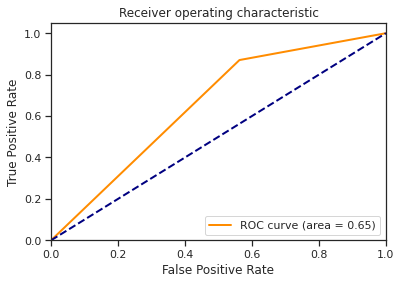

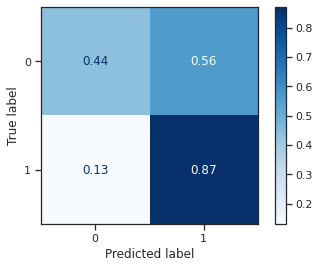

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


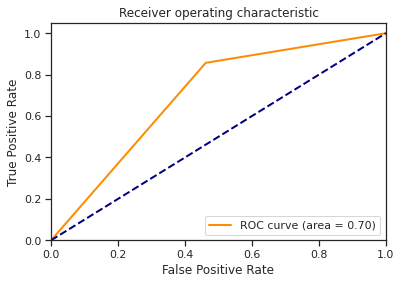

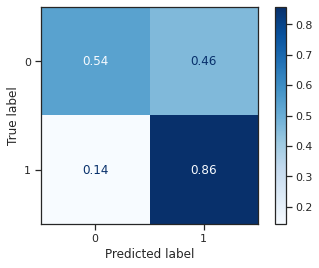

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
*****************************************************


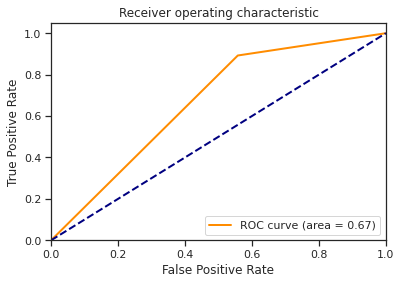

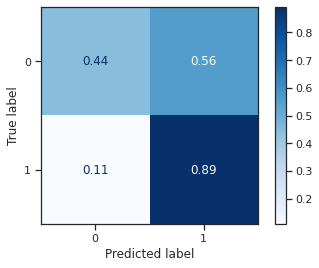

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


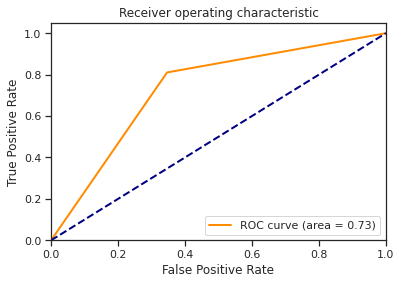

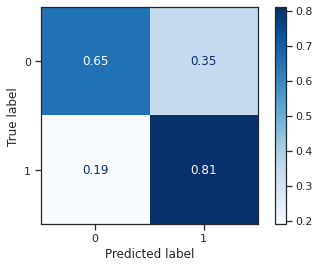

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


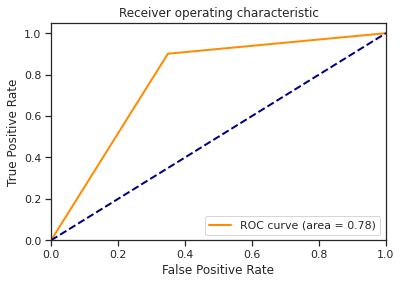

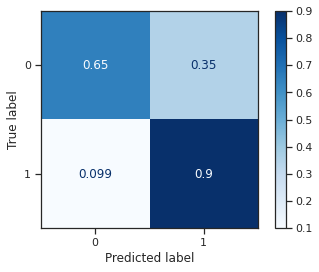

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


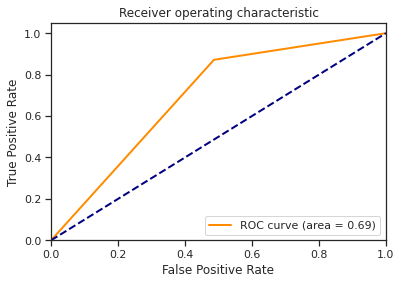

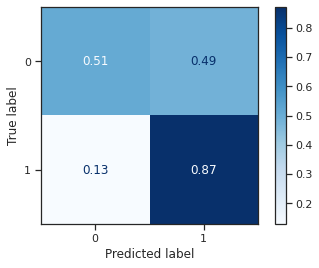

In [45]:
for model_name, model in class_models.items():
    class_train_model(model_name, model, classMetricLogger)

## 9. Подбор гиперпараметров для выбранных моделей

In [46]:
x_train.shape

(3673, 5)

In [52]:
n_range = np.array(range(1,400,10))
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
         131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
         261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
         391])}]

In [53]:
%%time
clf_gs = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(x_train, y_train)

CPU times: user 3min 1s, sys: 339 ms, total: 3min 1s
Wall time: 3min 2s


In [54]:
# Лучшая модель
clf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=261,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_estimators': 261}

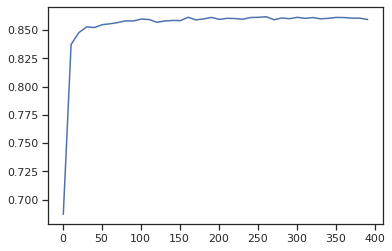

In [56]:
# Изменение качества на тестовой выборке в зависимости от количества деревьев
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## 10. Построение моделей для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей

In [0]:
class_models_grid = {'RF_260': clf_gs.best_estimator_}

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=261,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


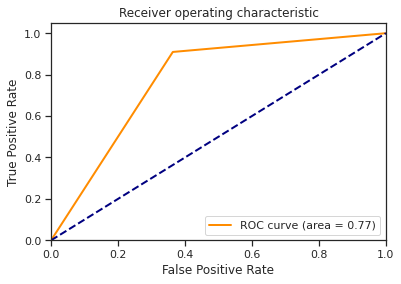

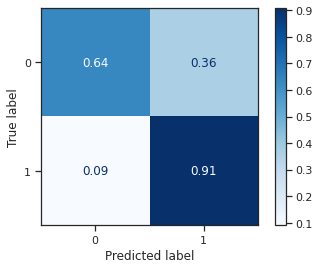

In [62]:
for model_name, model in class_models_grid.items():
    class_train_model(model_name, model, classMetricLogger)

## 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик

In [63]:
# Метрики качества модели
class_metrics = classMetricLogger.df['metric'].unique()
class_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

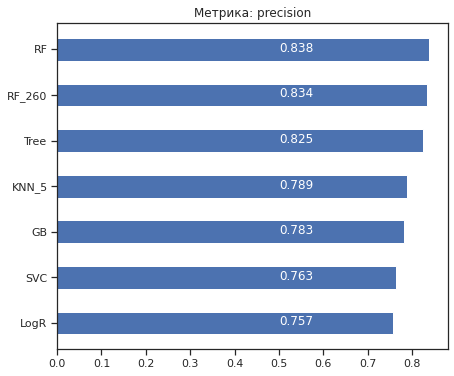

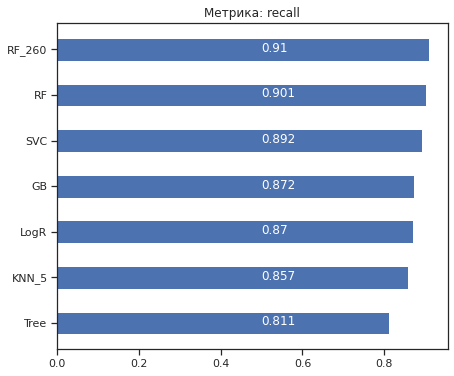

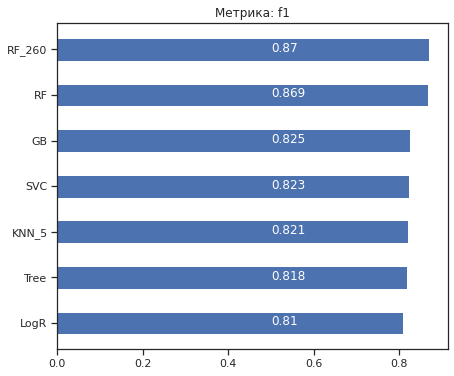

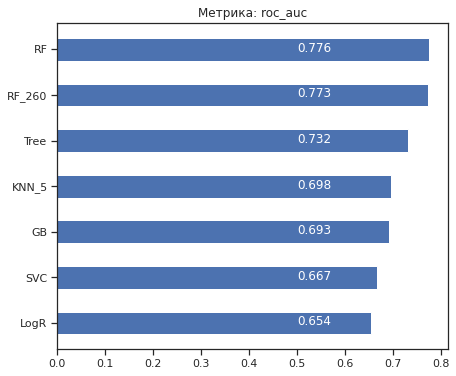

In [72]:
# Построим графики метрик качества модели
for metric in class_metrics:
    classMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Лучшими оказались модели случайного леса